In [5]:
from os.path import exists
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('housing.csv') if exists('housing.csv) else 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data.dropna(inplace=True)

In [12]:
from sklearn.model_selection import train_test_split

x = data.drop('median_house_value', axis = 1)
y = data['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [13]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13264,-117.66,34.10,26.0,1855.0,553.0,1109.0,536.0,2.2429,INLAND,150000.0
3371,-118.28,34.26,32.0,1079.0,207.0,486.0,167.0,4.9833,<1H OCEAN,213000.0
5220,-118.24,33.95,36.0,2316.0,543.0,1938.0,507.0,1.2500,<1H OCEAN,97400.0
5028,-118.32,33.98,47.0,949.0,210.0,574.0,217.0,2.1750,<1H OCEAN,114700.0
13216,-117.73,34.01,36.0,2340.0,392.0,1213.0,388.0,4.1250,INLAND,213000.0
...,...,...,...,...,...,...,...,...,...,...
19279,-122.72,38.42,26.0,1168.0,253.0,937.0,248.0,1.9458,<1H OCEAN,146000.0
671,-122.16,37.70,36.0,1097.0,208.0,568.0,225.0,2.9917,NEAR BAY,194600.0
16649,-120.64,35.26,21.0,3298.0,716.0,1862.0,687.0,2.1507,NEAR OCEAN,221500.0
13950,-117.07,34.24,21.0,4773.0,1047.0,337.0,130.0,3.9375,INLAND,115000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

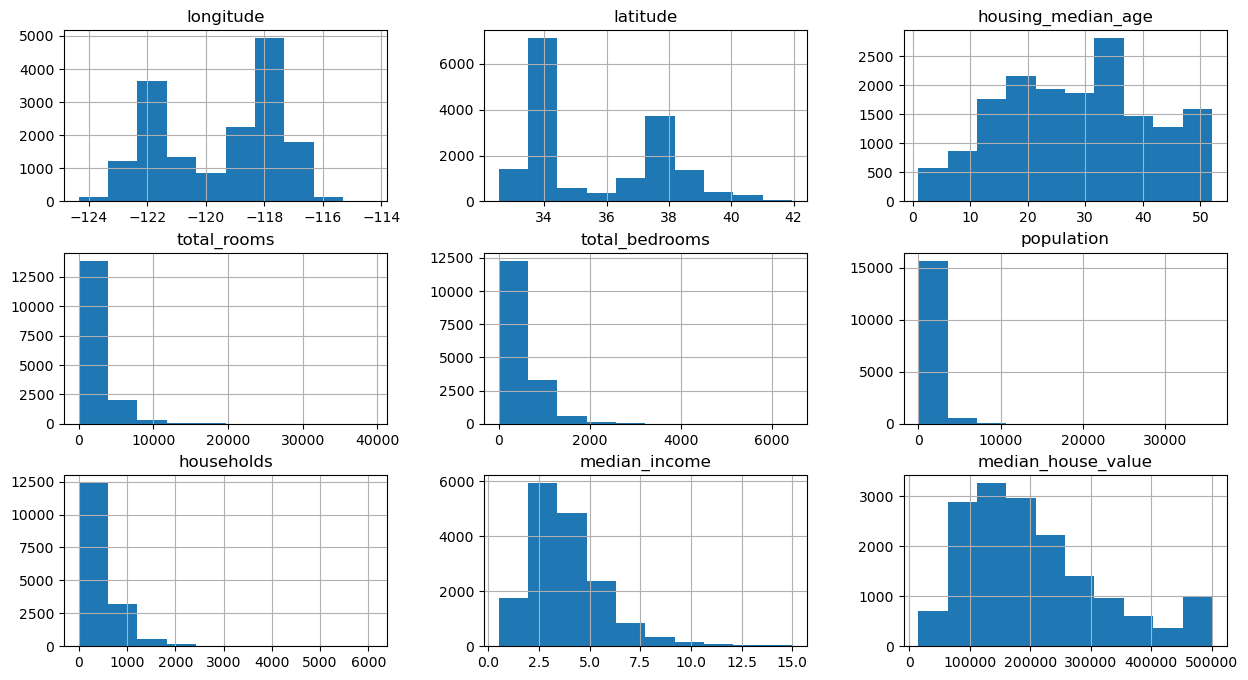

In [14]:
train_data.hist(figsize=(15,8))

/var/folders/p6/7rqrp6w17vl0ny3w4x6480br0000gn/T/ipykernel_1043/3679190433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = ['yellow', 'green', 'blue'])


<Axes: >

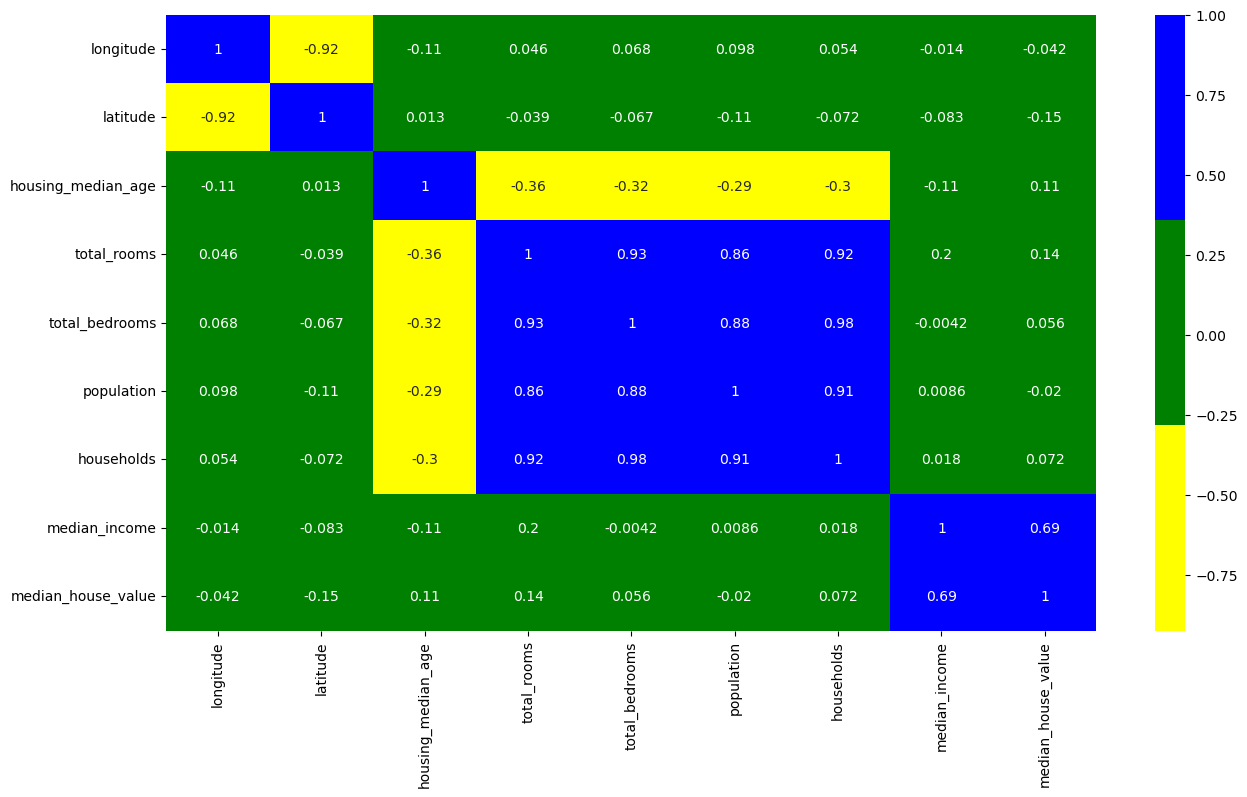

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = ['yellow', 'green', 'blue'])

In [16]:
train_data['population'] = np.log(train_data['population'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

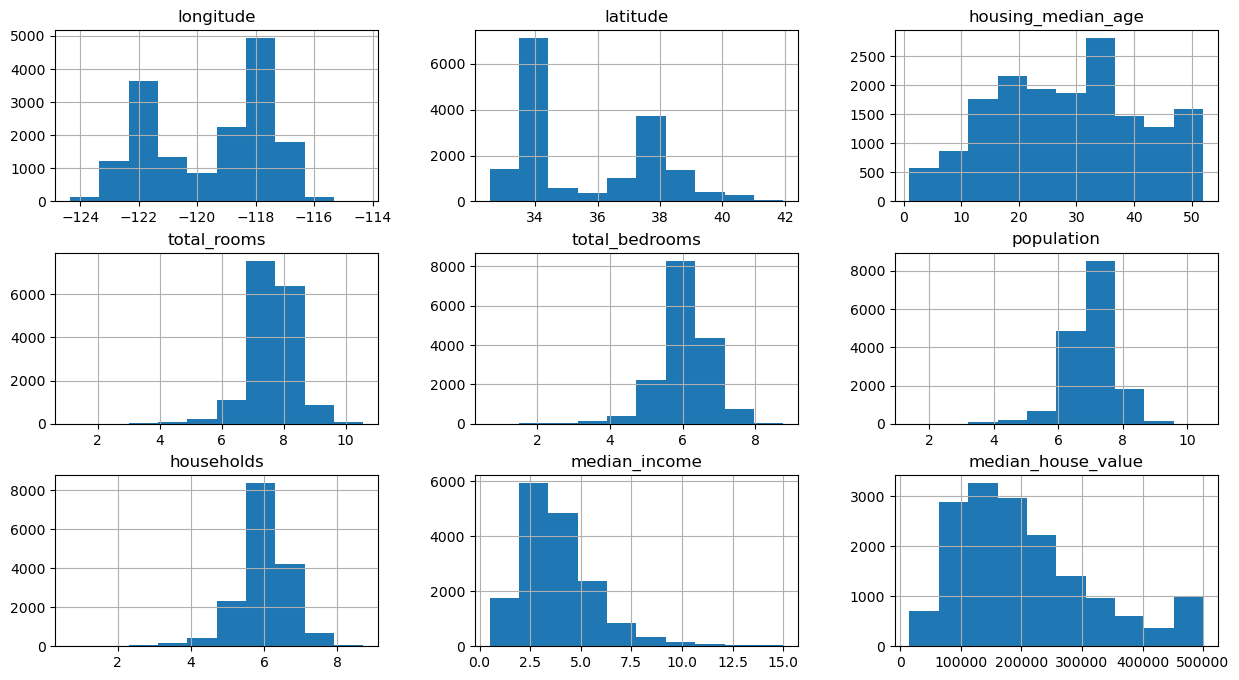

In [18]:
train_data.hist(figsize = (15,8))

In [22]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     7188
INLAND        5245
NEAR OCEAN    2117
NEAR BAY      1791
ISLAND           5
Name: ocean_proximity, dtype: int64

In [55]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

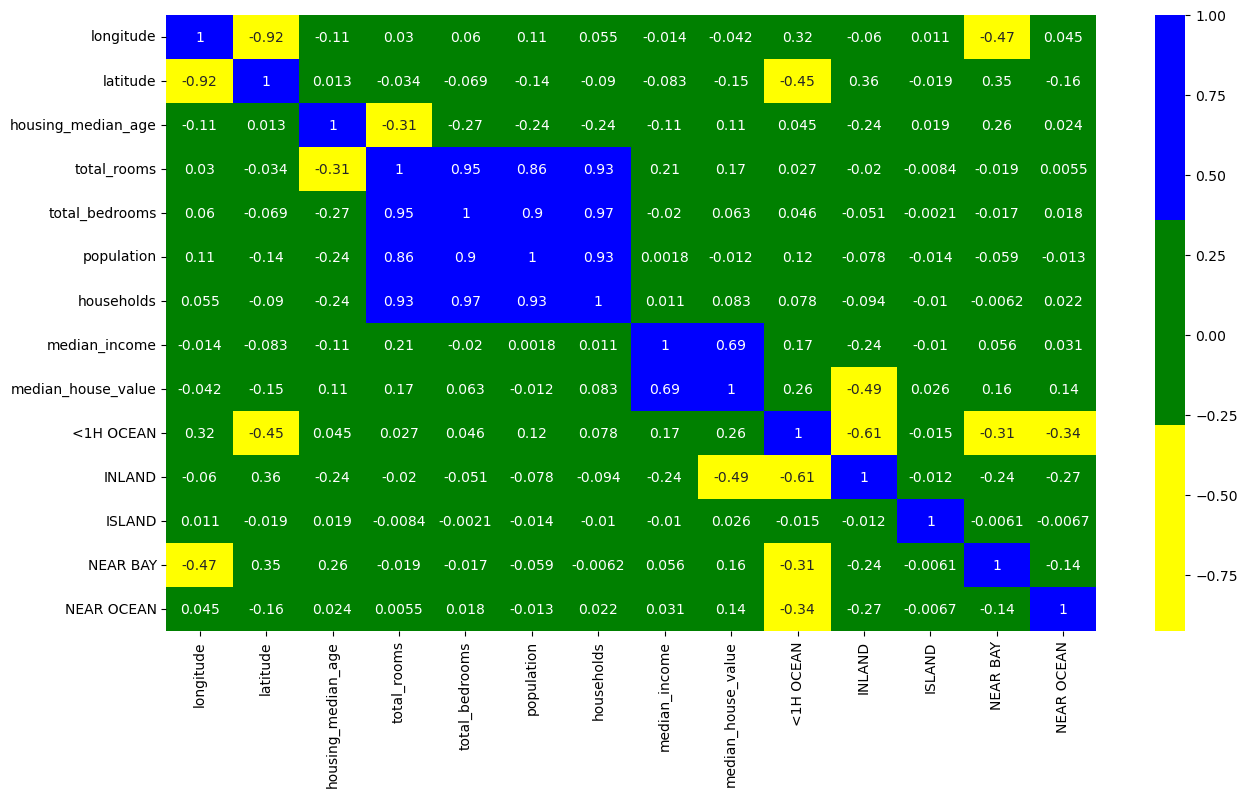

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = ['yellow', 'green', 'blue'])

In [58]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(('median_house_value'), axis = 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s,y_train)

LinearRegression()

In [69]:
test_data = x_train.join(y_train)

test_data['population'] = np.log(test_data['population'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
13264,-117.66,34.10,26.0,2.143141,1.990223,2.080955,1.985954,2.2429,0,1,0,0,0,0.928648,1.079149,150000.0
3371,-118.28,34.26,32.0,2.077529,1.846490,1.972450,1.812210,4.9833,1,0,0,0,0,0.888792,1.146407,213000.0
5220,-118.24,33.95,36.0,2.168828,1.987730,2.148259,1.978306,1.2500,1,0,0,0,0,0.916500,1.096306,97400.0
5028,-118.32,33.98,47.0,2.061336,1.848747,1.995295,1.853872,2.1750,1,0,0,0,0,0.896868,1.111908,114700.0
13216,-117.73,34.01,36.0,2.170006,1.942162,2.092071,1.940694,4.1250,0,1,0,0,0,0.895003,1.118160,213000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19279,-122.72,38.42,26.0,2.087398,1.877529,2.059717,1.874484,1.9458,1,0,0,0,0,0.899459,1.113586,146000.0
671,-122.16,37.70,36.0,2.079597,1.847247,1.993867,1.859501,2.9917,0,0,0,1,0,0.888271,1.118363,194600.0
16649,-120.64,35.26,21.0,2.208425,2.024863,2.143583,2.019398,2.1507,0,0,0,0,1,0.916881,1.093606,221500.0
13950,-117.07,34.24,21.0,2.248228,2.073755,1.920306,1.770740,3.9375,0,1,0,0,0,0.922395,1.269655,115000.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16746,-122.46,37.70,37.0,1028.0,275.0,904.0,261.0,3.5035,NEAR OCEAN
12473,-121.47,38.58,43.0,3807.0,952.0,1484.0,850.0,2.3266,INLAND
12567,-121.42,38.54,18.0,2525.0,501.0,1726.0,468.0,2.3980,INLAND
4263,-118.33,34.10,43.0,2732.0,1646.0,3049.0,1429.0,1.3157,<1H OCEAN
19999,-119.31,36.06,20.0,2236.0,434.0,1405.0,412.0,1.8827,INLAND
...,...,...,...,...,...,...,...,...,...
10388,-117.64,33.59,4.0,3274.0,383.0,1312.0,390.0,8.1611,<1H OCEAN
6484,-118.02,34.09,24.0,2080.0,514.0,1976.0,478.0,2.6917,INLAND
8006,-118.10,33.85,36.0,956.0,159.0,416.0,157.0,4.6429,<1H OCEAN
5801,-118.24,34.14,9.0,4877.0,1488.0,4486.0,1458.0,2.4421,<1H OCEAN


In [74]:
x_test, y_test = train_data.drop(('median_house_value'), axis = 1), test_data['median_house_value']

In [76]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13264,-117.66,34.10,26.0,7.526179,6.317165,7.012115,6.285998,2.2429,0,1,0,0,0,0.839359,1.197293
3371,-118.28,34.26,32.0,6.984716,5.337538,6.188264,5.123964,4.9833,1,0,0,0,0,0.764174,1.363147
5220,-118.24,33.95,36.0,7.748029,6.298949,7.569928,6.230481,1.2500,1,0,0,0,0,0.812974,1.243568
5028,-118.32,33.98,47.0,6.856462,5.351858,6.354370,5.384495,2.1750,1,0,0,0,0,0.780557,1.273371
13216,-117.73,34.01,36.0,7.758333,5.973810,7.101676,5.963579,4.1250,0,1,0,0,0,0.769986,1.300953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19279,-122.72,38.42,26.0,7.063904,5.537334,6.843750,5.517453,1.9458,1,0,0,0,0,0.783891,1.280284
671,-122.16,37.70,36.0,7.001246,5.342334,6.343880,5.420535,2.9917,0,0,0,1,0,0.763055,1.291615
16649,-120.64,35.26,21.0,8.101375,6.575076,7.529943,6.533789,2.1507,0,0,0,0,1,0.811600,1.239920
13950,-117.07,34.24,21.0,8.470940,6.954639,5.823046,4.875197,3.9375,0,1,0,0,0,0.821000,1.737558


In [93]:
x_test_s = scaler.transform(x_test)

In [94]:
reg.score(x_test_s,y_test)

0.671799485546629

In [96]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [100]:
forest.score(x_test,y_test)

0.973995536991117